In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp 

In [3]:
df=pd.read_csv('globalterrorismdb_0718dist.csv',encoding='ISO-8859-1')

/home/paulina_cieslinska/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [16]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [20]:
df.approxdate.unique()

array([nan, 'January 19-20, 1970', 'February 6-9, 1970', ...,
       '2017-12-29 00:00:00', 'December 25, 2017-January 5, 2018',
       '2017-12-31 00:00:00'], dtype=object)

In [17]:
df.dtypes

eventid                 int64
iyear                   int64
imonth                  int64
iday                    int64
approxdate             object
extended                int64
resolution             object
country                 int64
country_txt            object
region                  int64
region_txt             object
provstate              object
city                   object
latitude              float64
longitude             float64
specificity           float64
vicinity                int64
location               object
summary                object
crit1                   int64
crit2                   int64
crit3                   int64
doubtterr             float64
alternative           float64
alternative_txt        object
multiple              float64
success                 int64
suicide                 int64
attacktype1             int64
attacktype1_txt        object
attacktype2           float64
attacktype2_txt        object
attacktype3           float64
attacktype

In [38]:
df2=df[['iyear','imonth','iday','country_txt','region_txt','city','attacktype1_txt','targtype1_txt','weaptype1_txt','nkill','natlty1_txt']]

In [39]:
df2.head(10)

,iyear,imonth,iday,country_txt,region_txt,city,attacktype1_txt,targtype1_txt,weaptype1_txt,nkill,natlty1_txt
0,1970,7,2,Dominican Republic,Central America & Caribbean,Santo Domingo,Assassination,Private Citizens & Property,Unknown,1.0,Dominican Republic
1,1970,0,0,Mexico,North America,Mexico city,Hostage Taking (Kidnapping),Government (Diplomatic),Unknown,0.0,Belgium
2,1970,1,0,Philippines,Southeast Asia,Unknown,Assassination,Journalists & Media,Unknown,1.0,United States
3,1970,1,0,Greece,Western Europe,Athens,Bombing/Explosion,Government (Diplomatic),Explosives,NaN,United States
4,1970,1,0,Japan,East Asia,Fukouka,Facility/Infrastructure Attack,Government (Diplomatic),Incendiary,NaN,United States
5,1970,1,1,United States,North America,Cairo,Armed Assault,Police,Firearms,0.0,United States
6,1970,1,2,Uruguay,South America,Montevideo,Assassination,Police,Firearms,0.0,Uruguay
7,1970,1,2,United States,North America,Oakland,Bombing/Explosion,Utilities,Explosives,0.0,United States
8,1970,1,2,United States,North America,Madison,Facility/Infrastructure Attack,Military,Incendiary,0.0,United States
9,1970,1,3,United States,North America,Madison,Facility/Infrastructure Attack,Government (General),Incendiary,0.0,United States


In [37]:
df.attacktype1_txt.unique()

array(['Assassination', 'Hostage Taking (Kidnapping)',
       'Bombing/Explosion', 'Facility/Infrastructure Attack',
       'Armed Assault', 'Hijacking', 'Unknown', 'Unarmed Assault',
       'Hostage Taking (Barricade Incident)'], dtype=object)

In [56]:
df2.dtypes

iyear                int64
imonth               int64
iday                 int64
country_txt         object
region_txt          object
city                object
attacktype1_txt     object
targtype1_txt       object
weaptype1_txt       object
nkill              float64
natlty1_txt         object
dtype: object

In [41]:
df3=df2.dropna()

In [79]:
df4=df3[['iyear','nkill']]

In [83]:
x=df4.groupby(df4.iyear).count()
#set_index(['iyear','nkill']).count(level='iyear')

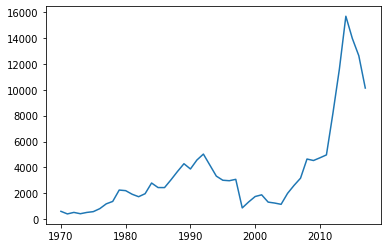

In [84]:
plt.plot(x) #ilośc wystąpień

In [59]:
y=df3.groupby(df3.iyear)['nkill'].sum(axis=1)

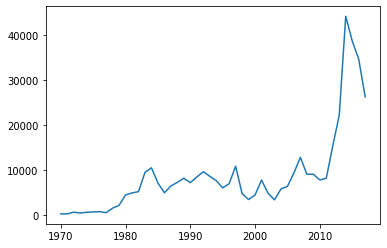

In [60]:
plt.plot(y) #ilośc ofiar

In [ ]:
#liczba odiar przez liczbe zdarzeń 
y=df3.groupby(df3.iyear)['nkill'].sum(axis=1)

In [86]:
z=x.merge(y, left_on='iyear', right_on='iyear')

In [88]:
z['ile_os_avg']=z.nkill_y/z.nkill_x

In [91]:
z.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47 entries, 1970 to 2017
Data columns (total 3 columns):
nkill_x       47 non-null int64
nkill_y       47 non-null float64
ile_os_avg    47 non-null float64
dtypes: float64(2), int64(1)
memory usage: 1.5 KB


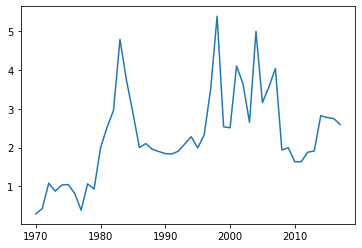

In [96]:
x=z.index.values
y=z.ile_os_avg
plt.plot(x,y)

In [93]:
z=z.groupby(z.iyear,as_index= False)['ile_os_avg'].sum(axis=1)

AttributeError: 'DataFrame' object has no attribute 'iyear'

In [68]:
lista=df3.nkill.values
list(set(lista))

[0.0,
 1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 140.0,
 141.0,
 142.0,
 143.0,
 144.0,
 145.

In [57]:
y

iyear
1970      174.0
1971      173.0
1972      566.0
1973      369.0
1974      539.0
1975      609.0
1976      666.0
1977      455.0
1978     1459.0
1979     2095.0
1980     4398.0
1981     4850.0
1982     5135.0
1983     9429.0
1984    10445.0
1985     7068.0
1986     4883.0
1987     6399.0
1988     7204.0
1989     8129.0
1990     7147.0
1991     8391.0
1992     9570.0
1994     7580.0
1995     5989.0
1996     6904.0
1997    10805.0
1998     4688.0
1999     3389.0
2000     4394.0
2001     7720.0
2002     4805.0
2003     3305.0
2004     5738.0
2005     6307.0
2006     9310.0
2007    12787.0
2008     8999.0
2009     9030.0
2010     7735.0
2011     8128.0
2012    15369.0
2013    22158.0
2014    44221.0
2015    38731.0
2016    34702.0
2017    26277.0
Name: nkill, dtype: float64

In [58]:
x

iyear
1970      174.0
1971      173.0
1972      566.0
1973      369.0
1974      539.0
1975      609.0
1976      666.0
1977      455.0
1978     1459.0
1979     2095.0
1980     4398.0
1981     4850.0
1982     5135.0
1983     9429.0
1984    10445.0
1985     7068.0
1986     4883.0
1987     6399.0
1988     7204.0
1989     8129.0
1990     7147.0
1991     8391.0
1992     9570.0
1994     7580.0
1995     5989.0
1996     6904.0
1997    10805.0
1998     4688.0
1999     3389.0
2000     4394.0
2001     7720.0
2002     4805.0
2003     3305.0
2004     5738.0
2005     6307.0
2006     9310.0
2007    12787.0
2008     8999.0
2009     9030.0
2010     7735.0
2011     8128.0
2012    15369.0
2013    22158.0
2014    44221.0
2015    38731.0
2016    34702.0
2017    26277.0
Name: nkill, dtype: float64